<a href="https://colab.research.google.com/github/MarkusThill/techdays25/blob/feature-lab1/notebooks/lab1-my-first-onnx-model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🚀 Lab 1: Crafting Your First ONNX Model from Scratch

## Preparation: Setup and install Dependencies

In [19]:
# Remove the `%%capture`, if you have the impression that something is going wrong during the setup
#%%capture
!pip install "techdays25[lab1] @ git+https://github.com/MarkusThill/techdays25.git@feature-lab1"

  Cloning https://github.com/MarkusThill/techdays25.git (to revision feature-lab1) to /tmp/pip-install-pecykzys/techdays25_3fc1cf10fb9543dd9c4cdf9e79c2ad85
  Running command git clone --filter=blob:none --quiet https://github.com/MarkusThill/techdays25.git /tmp/pip-install-pecykzys/techdays25_3fc1cf10fb9543dd9c4cdf9e79c2ad85
  Running command git checkout -b feature-lab1 --track origin/feature-lab1
  Switched to a new branch 'feature-lab1'
  Branch 'feature-lab1' set up to track remote branch 'feature-lab1' from 'origin'.
  Resolved https://github.com/MarkusThill/techdays25.git to commit 59502c1406486de13a9a85b28650fc3ae64b4abe
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pandas-2.2.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (89 kB)
  Using cached numpy-2.2.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
  Using cached matplot

## Introduction

Notes:
- Assume that we record pairs of  using a

## Data Generation

In [1]:
# Import the data generation module and generate a small 2-dimensional dataset
from techdays25 import measurement_utils as mu
df = mu.generate_measurement_data()

print("df.shape:", df.shape)

# Show the first few lines of the DataFrame
df.head()

df.shape: (100, 2)


,voltage [V],current [mA]
0,4.494481,16.316118
1,11.408572,29.384164
2,8.783927,25.462657
3,7.183902,13.210136
4,1.872224,9.431659


In [2]:
from matplotlib import pyplot as plt

def plot_data(xx, yy, yy_pred=None, xlabel="$U \\ [V]$", ylabel="$I \\ [mA]$"):
  fig, ax = plt.subplots(figsize=(10, 6))
  fig.canvas.toolbar_visible = False
  fig.canvas.resizable = False
  fig.canvas.toolbar_visible = False
  fig.canvas.header_visible = False
  fig.canvas.footer_visible = False
  fig.canvas.capture_scroll = False

  ax.scatter(xx, yy, label="data")

  if yy_pred is not None:
    # It is sufficient to use only both ends of the line:
    ax.plot([min(xx), max(xx)], [min(yy_pred), max(yy_pred)], color='red', label='model output')
    ax.scatter(xx, yy_pred, color='red', label='model output', marker='x')

  ax.minorticks_on()
  ax.set_xlabel(xlabel)
  ax.set_ylabel(ylabel)

  ax.grid(True, which="both")

  ax.legend()
  plt.show()

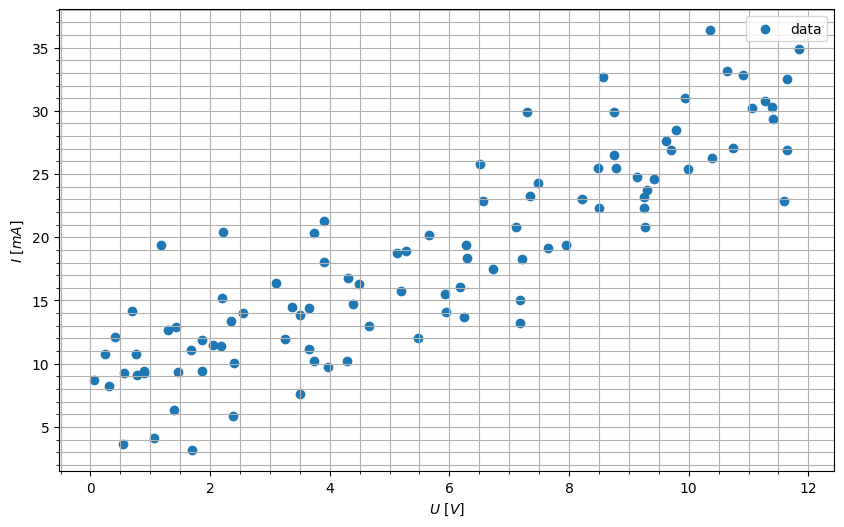

In [5]:
# @title Visualize the Generated Data {display-mode: "form"}
plot_data(*df.to_numpy().T)